## Sequence processing with Convets

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [3]:
max_features = 10000
maxlen = 500

In [4]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
# padding data
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
from keras import models, layers
from keras.optimizers import RMSprop

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [13]:
hist = model.fit(x_train, y_train,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.7679 - acc: 0.5198 - val_loss: 0.6863 - val_acc: 0.5720
Epoch 2/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6682 - acc: 0.6611 - val_loss: 0.6664 - val_acc: 0.6358
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6258 - acc: 0.7532 - val_loss: 0.6148 - val_acc: 0.7152
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.5339 - acc: 0.8047 - val_loss: 0.4948 - val_acc: 0.8048
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.4115 - acc: 0.8439 - val_loss: 0.4255 - val_acc: 0.8364
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3406 - acc: 0.8697 - val_loss: 0.4071 - val_acc: 0.8418
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3000 - acc: 0.8715 - val_loss: 0.3956 - val_acc:

In [14]:
from myutils import *

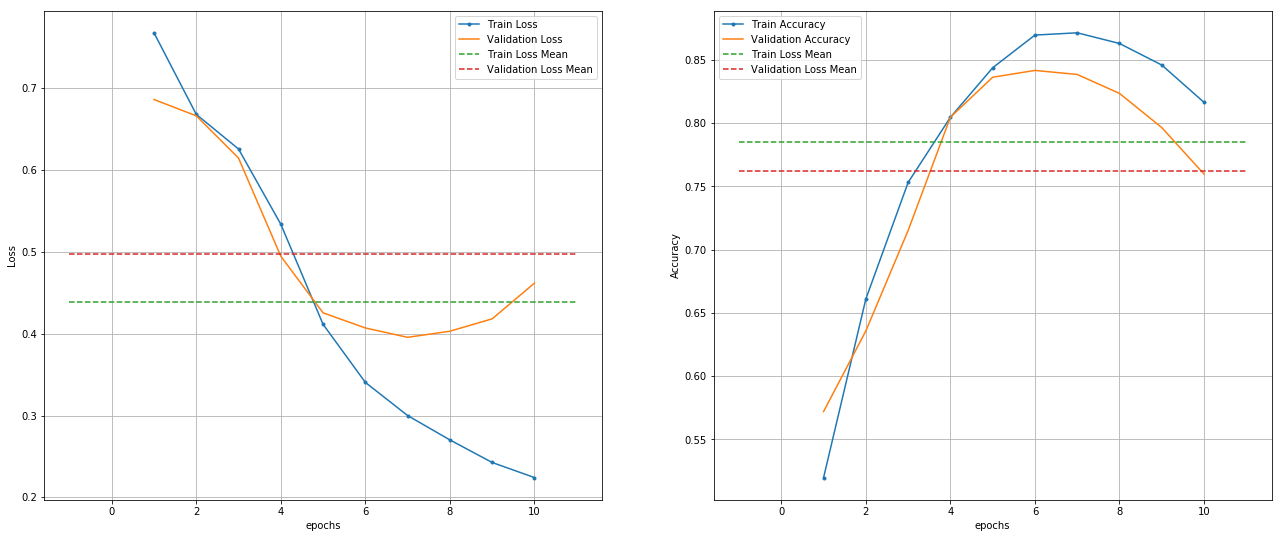

In [15]:
plot_keras_acc_ax(hist)